In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from scipy.stats import multivariate_normal
from sklearn import datasets
from sklearn.mixture import GaussianMixture

In [2]:
iris = datasets.load_iris()
cols = iris.feature_names
data = iris.data

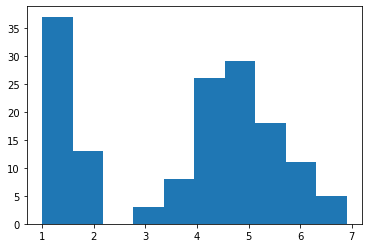

In [3]:
plt.hist(data[:,2])
plt.show()

In [4]:
X = np.sort(data[:, 2]).reshape(-1,1)
gmm = GaussianMixture(n_components=2)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [5]:
gmm.weights_

array([0.66688872, 0.33311128])

In [6]:
gmm.means_

array([[4.90497803],
       [1.46175017]])

In [7]:
gmm.covariances_

array([[[0.67768389]],

       [[0.02946712]]])

In [8]:
gmm.score_samples(X).sum()

-200.57875899027368

In [9]:
gmm.score(X)

-1.3371917266018245

In [10]:
lx = multivariate_normal(mean=gmm.means_[0], cov=gmm.covariances_[0]).pdf(X) * gmm.weights_[0] \
+ \
multivariate_normal(mean=gmm.means_[1], cov=gmm.covariances_[1]).pdf(X) * gmm.weights_[1]

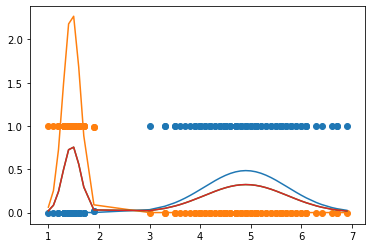

In [11]:

X_Prob = gmm.predict_proba(X)
for i in range(X_Prob.shape[1]):
    plt.scatter(X[:,0], X_Prob[:,i])
    var = multivariate_normal(mean=gmm.means_[i], cov=gmm.covariances_[i])
    plt.plot(X[:,0], var.pdf(X))
plt.plot(X[:,0], np.exp(gmm.score_samples(X)))
plt.plot(X[:,0], lx)

In [12]:
round((np.exp(gmm.score_samples(X))-lx).sum(),10)

-0.0

In [16]:
a = multivariate_normal(mean=gmm.means_[0], cov=gmm.covariances_[0]).pdf(X) * gmm.weights_[0]
b = multivariate_normal(mean=gmm.means_[1], cov=gmm.covariances_[1]).pdf(X) * gmm.weights_[1]
post_proba = np.array([(a)/(a+b),(b)/(b+a)]).T

In [19]:
round((gmm.predict_proba(X)-post_proba).sum(axis=1).sum(axis=0), 10)

-0.0

In [16]:
gmm.score_samples(X).shape

(150,)

In [17]:
from scipy.stats import multivariate_normal
var = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
var.cdf([0,0])

0.25

In [18]:
scipy.stats.norm(gmm.means_[i,0], np.sqrt(gmm.covariances_[i][0][0])).pdf([1,2])

array([0.0623798 , 0.01703365])

In [19]:
scipy.stats.norm(1.5, 0.005).cdf(1.5)

0.5

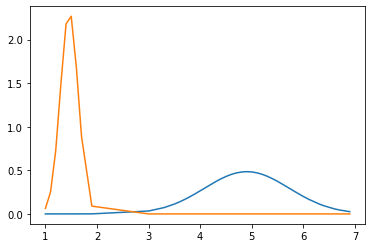

In [20]:
for i in range(2):
    n = scipy.stats.norm(gmm.means_[i,0], np.sqrt(gmm.covariances_[i][0][0])).pdf(X)
    plt.plot(X, n)
#plt.scatter(X[:,0], np.zeros(X.shape[0]));

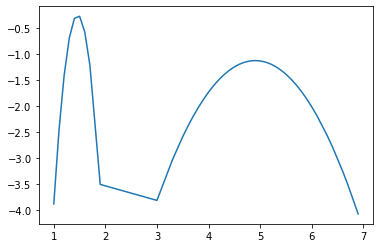

In [21]:
plt.plot(X[:,0], gmm.score_samples(X))

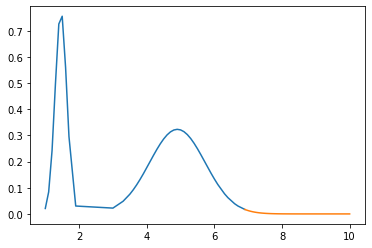

In [22]:
plt.plot(X[:,0], np.exp(gmm.score_samples(X)))
plt.plot(np.linspace(X[:,0].max(),10,100).reshape(-1,1), 
np.exp(gmm.score_samples(np.linspace(X[:,0].max(),10,100).reshape(-1,1))))

In [23]:
gmm.predict_proba(X)

array([[2.02118629e-004, 9.99797881e-001],
       [8.82782865e-005, 9.99911722e-001],
       [5.33385715e-005, 9.99946661e-001],
       [5.33385715e-005, 9.99946661e-001],
       [4.45853006e-005, 9.99955415e-001],
       [4.45853006e-005, 9.99955415e-001],
       [4.45853006e-005, 9.99955415e-001],
       [4.45853006e-005, 9.99955415e-001],
       [4.45853006e-005, 9.99955415e-001],
       [4.45853006e-005, 9.99955415e-001],
       [4.45853006e-005, 9.99955415e-001],
       [5.15595827e-005, 9.99948440e-001],
       [5.15595827e-005, 9.99948440e-001],
       [5.15595827e-005, 9.99948440e-001],
       [5.15595827e-005, 9.99948440e-001],
       [5.15595827e-005, 9.99948440e-001],
       [5.15595827e-005, 9.99948440e-001],
       [5.15595827e-005, 9.99948440e-001],
       [5.15595827e-005, 9.99948440e-001],
       [5.15595827e-005, 9.99948440e-001],
       [5.15595827e-005, 9.99948440e-001],
       [5.15595827e-005, 9.99948440e-001],
       [5.15595827e-005, 9.99948440e-001],
       [5.1

In [24]:
from sklearn.metrics import silhouette_score
print ("gmm: silhouttte: ", silhouette_score(X, gmm.predict(X)))

gmm: silhouttte:  0.7850683677228648


# Multinomial GMM

In [25]:
gmm = GaussianMixture(n_components=2, covariance_type="full")
gmm.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [26]:
gmm.score_samples(data).shape

(150,)

In [27]:
gmm.covariances_

array([[[0.43497387, 0.12094155, 0.44886533, 0.16550229],
        [0.12094155, 0.10961836, 0.14138002, 0.07923243],
        [0.44886533, 0.14138002, 0.67484296, 0.2858736 ],
        [0.16550229, 0.07923243, 0.2858736 , 0.17863587]],

       [[0.12176331, 0.09722605, 0.01602717, 0.01012447],
        [0.09722605, 0.14080279, 0.01146185, 0.00911288],
        [0.01602717, 0.01146185, 0.02955704, 0.00594818],
        [0.01012447, 0.00911288, 0.00594818, 0.0108851 ]]])

In [28]:
gmm.means_

array([[6.26198886, 2.87199642, 4.90597719, 1.67599129],
       [5.00600639, 3.4280142 , 1.46200203, 0.24599932]])

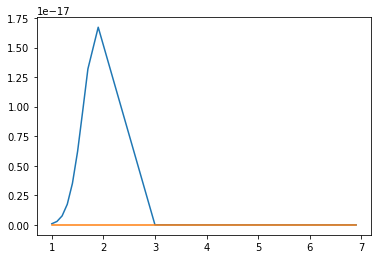

In [29]:
from scipy.stats import multivariate_normal
for i in range(2):
    var = multivariate_normal(mean=gmm.means_[i], cov=gmm.covariances_[i])
    plt.plot(X[:,0], var.pdf(X))

# fabricated example
to show score_sample is pdf

In [30]:
data = 10 * np.random.rand(100)
model = GaussianMixture(n_components=1).fit(data[:, None])
xfit = np.linspace(-5, 15, 5000)
logprob = model.score_samples(xfit[:, None])
dx = xfit[1] - xfit[0]
print(dx * np.sum(np.exp(logprob)))
# 0.999773872653

0.9992280718135363


# Density Estimation

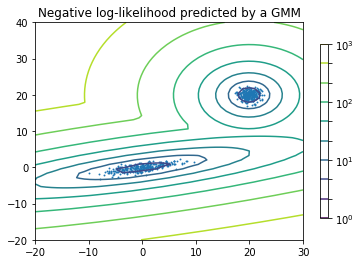

In [31]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()